# Market Data and Pandas library

In [49]:
#We bring what we did in lecture 1

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, chi2
import pandas as pd

def JB_test(x, type_random_variable = "Normal", dof = 2):
    # Compute risk metrics
    x_mean = np.mean(x)
    x_stdev = np.std(x) #volatility
    
    #We need skewness and kurtosis

    from scipy.stats import skew, kurtosis, chi2
    
    x_skew = skew(x)
    x_kurt = kurtosis(x) #excess kurtosis is kurtosis - 3, so 0 for a standard normal distribution
    x_sharpe = x_mean / x_stdev * np.sqrt(252) # expected return per risk unit
    x_var_95 = np.percentile(x, 5)
    x_cvar_95 = np.mean(x[x <= x_var_95])
    jb = len(x)/6 * (x_skew**2 + 1/4*x_kurt**2)
    p_value = 1 - chi2.cdf(jb, df = 2)
    is_normal = (p_value > 0.05) # equivalently jb < 6
    
    print(f"Mean: {x_mean}")
    print(f"Stdev: {x_stdev}")
    print(f"Skewness: {x_skew}") # inclination of the distribution
    print(f"Kurtosis: {x_kurt}") # how big are the tails? big if > 0
    print(f"Sharpe: {x_sharpe}")
    print(f"VaR 95%: {x_var_95}")
    print(f"CVaR 95%: {x_cvar_95}")
    print(f"Jarque-Bera: {jb}")
    print(f"p-value: {p_value}")
    print(f"Normality: {is_normal}")
    
    if type_random_variable == 'student':
        print(f"DoF for student distribution = {dof}")

    return is_normal

In [48]:
#input 
ric = '^VIX' #MXN=X ^IXIC DBK.DE ^VIX ^S&P500

#get market data

table_raw = pd.read_csv('data/' + ric + '.csv')

#create table of returns
t = pd.DataFrame()
t['date'] = pd.to_datetime(table_raw['Date'], dayfirst = True)
t['close'] = table_raw['Close']
t['close_previous'] = table_raw['Close'].shift(1)
t['return_close'] = t['close'] / t['close_previous'] - 1
t.sort_values(by='date', ascending = True)
t = t.dropna()
t = t.reset_index(drop=True)
t

,date,close,close_previous,return_close
0,2015-07-02,16.790001,16.090000,0.043505
1,2015-07-06,17.010000,16.790001,0.013103
2,2015-07-07,16.090000,17.010000,-0.054086
3,2015-07-08,19.660000,16.090000,0.221877
4,2015-07-09,19.969999,19.660000,0.015768
...,...,...,...,...
1252,2020-06-23,31.370001,31.770000,-0.012590
1253,2020-06-24,33.840000,31.370001,0.078738
1254,2020-06-25,32.220001,33.840000,-0.047872
1255,2020-06-26,34.730000,32.220001,0.077902


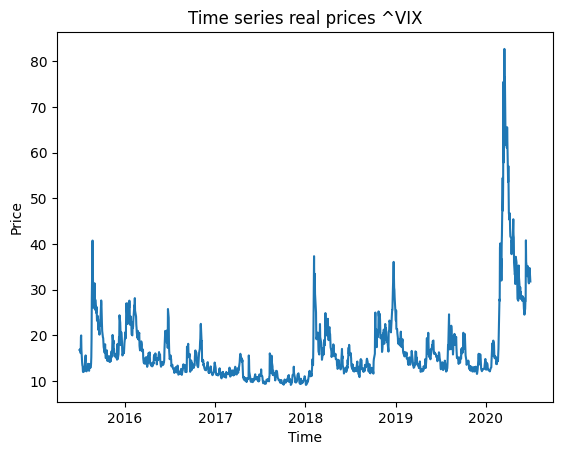

In [45]:
#plot time series for prices
plt.figure()
plt.plot(t['date'], t['close'])
plt.title('Time series real prices ' + ric)
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

Mean: 0.00443770829062825
Stdev: 0.09366844357777052
Skewness: 2.773878439864199
Kurtosis: 22.256826858431197
Sharpe: 0.7520829051656175
VaR 95%: -0.10982515767645222
CVaR 95%: -0.14960585258076717
Jarque-Bera: 27556.78928711945
p-value: 0.0
Normality: False


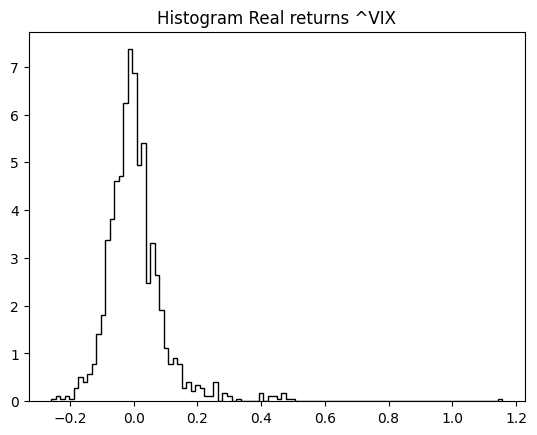

In [46]:
#input for Jarque-Bera test
x_str = 'Real returns ' + ric
x = t['return_close'].values # pd to array
JB_test(x)
plt.figure()
plt.hist(x, bins=100, edgecolor = 'black', histtype='step', density = True)
plt.title('Histogram ' + x_str) 
plt.show()

# What is VIX?

Implicit volatility of vanilla options whose underlying asset is the S&P500. When both indices are compared, VIX has a leverage effect, which makes it possible to obtain bigger returns. One can see this by plotting the histograms of the two indices.